# chapter2. 머신러닝 프로젝트 처음부터 끝까지

1. 실제 데이터로 작업하기
2. 큰 그림 보기 (성능측정지표선택, 가정검사)
3. 데이터 가져오기 (.info(), train_test_split)
4. 데이터 이해를 위한 탐색과 시각화 (cor, 특성조합실험)
5. 머신러닝모델 적용가능 형태 데이터 만들기
6. 모델선택과 훈련
7. 모델 세부 튜닝

### 2.2 큰그림 보기

2.2.1 문제정의 <br>
1. 비즈니스의 목적이 무엇인가
2. 현재 솔루션의 구성
3. 해결책 <br>

ex) 69page의 머신러닝주택회사 예시 참고 <br>
cf) **파이프라인** : CPU 처리성능 향상을 위해 Instruction 처리 과정을 여러 단계로 세분화하는 병렬처리 기법

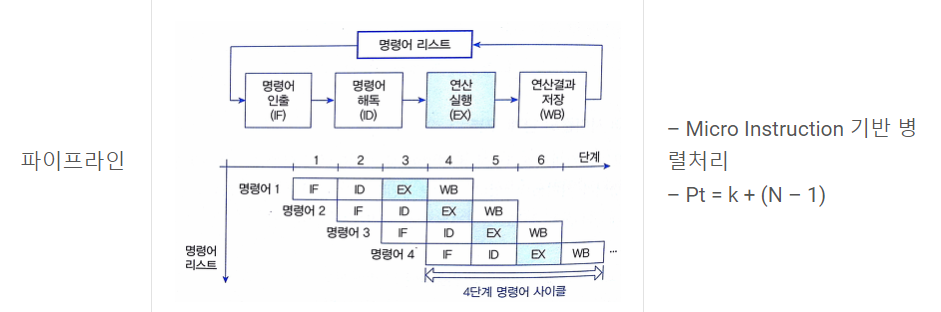

#### 2.2.2. 성능지표 선택
- 평균제곱오차(RMSE) : 회귀문제의 전형적 성능지표 
- 평균절대오차(MAE) : 이상치로 보이는 구역이 많은 경우의 성능지표  <br>

RMSE와 MAE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법이다. 

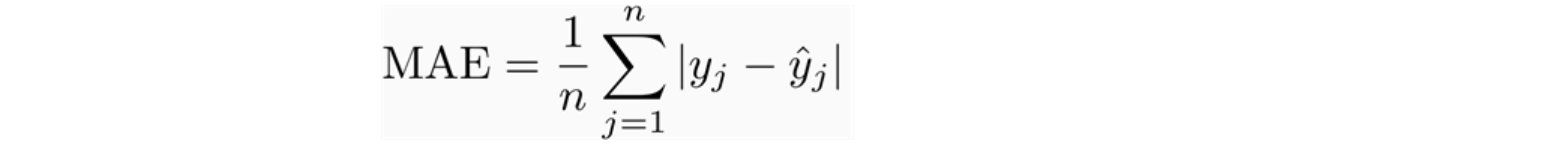

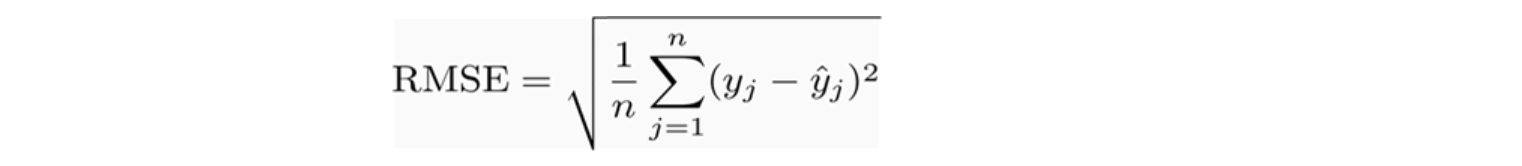

### 2.3 데이터 가져오기

In [40]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore")

In [1]:
#캘리포니아주 집값 데이터
import pandas as pd
housing=pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


기본적인 데이터 형태 확인하기

In [2]:
#데이터 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


.info()확인 결과, null값은 존재하지 않으며, ocean_proximity은 object즉 범주형 데이터임을 알 수가 있다. 범주형 데이터에 대해서는 value_counts()로 전체적인 분포를 확인한다. 물론 연속형 분포도 value_counts가능하지만, 대체적으로 범주형 변수에서 사용

In [3]:
#범주형 데이터 value_counts
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
#기초통계량 확인
#추후에 이상치 확인시 많이 사용
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


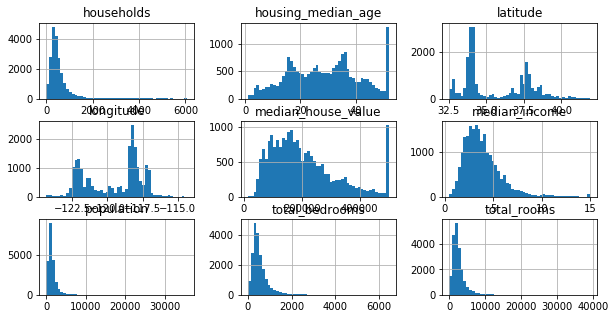

In [7]:
#시각화
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,5))
plt.show()

1. median_income이 US 달러로 표현되어 있지 않음 :  중요한 특성은 아님
2. housing median age, median house value는 최댓값과 최솟값으로 한정되어 있다. target값이 median_house_value이므로, 모델학습시에 한정된 결괏값이 나올 수가 있다. 이에 대한 처리가 필요
3. feature scaling 필요 : 모델의 성능향상
4. 꼬리가 두꺼움 : log transform, noramalization...

#### 2.3.4 테스트 셋 만들기
- sklearn의 train_test_split 매서드의 사용
- 사용자지정함수로 사용하는 경우 <br>



(1) 사용자지정함수

#test, train dataset분리해주는 함수 지정
```python
def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data)) #데이터 무작위화
    test_set_size=int(len(data)*test_ratio)  #test data의 비율 지정(일반적으로 0.2)
    test_indices=shuffled_indices[:test_set_size] #인덱싱 하여 추출
    train_indices=shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices],data.iloc[test_indices]
```
but 이 경우는 계속 데이터셋이 업데이트되는 형태이므로 모델적용에 적합x <br>

#해결방안<br>
1. 테스트 데이터 셋을 저장하고 다음 번 실행시 이를 부르는 방법
2. seed 지정
3. 샘플의 식별자(id)를 사용하여 테스트 셋 인덱싱번호를 지정해버리는 경우

In [8]:
import numpy as np

In [17]:
#테스트, 데이터셋을 독립적으로 분리시킬 수 있는 함수의 지정
#순환중복값 체크하는 모듈 
from zlib import crc32

def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xfffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index() #식별자
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

(2) sklearn 함수 사용

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
#target을 예측하는데 중요하다고 판단되는 median income feature를 범주화
#소득 카테고리를 기반으로 계층적추출방법을 사용하여, 데이터셋을 구성해야 한다. 
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

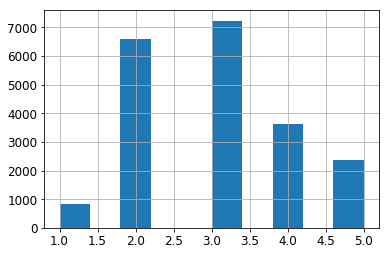

In [24]:
housing["income_cat"].hist()

여기선 계층적 sampling이지만 경우에 따라서는 KFOLDS방식을 사용하기도 한다. 

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
#각 소득 카테고리의 비율을 확인한다 
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층": income_cat_proportions(strat_test_set),
    "단순랜덤": income_cat_proportions(test_set),
}).sort_index()
compare_props["단순랜덤 샘플링 오류"] = 100 * compare_props["단순랜덤"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류"] = 100 * compare_props["계층"] / compare_props["전체"] - 100

compare_props

,전체,계층,단순랜덤,단순랜덤 샘플링 오류,계층 샘플링 오류
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

#### 2.4 데이터 이해를 위한 EDA

In [31]:
housing=strat_train_set.copy() #원본을 보존하기 위한다

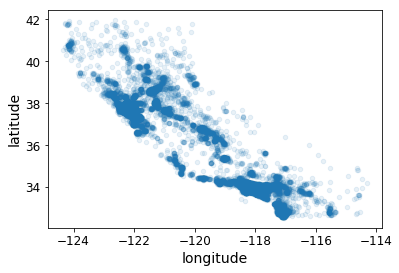

In [33]:
#데이터가 밀집된 지역을 잘 보기 위한 alpha옵션 지정
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

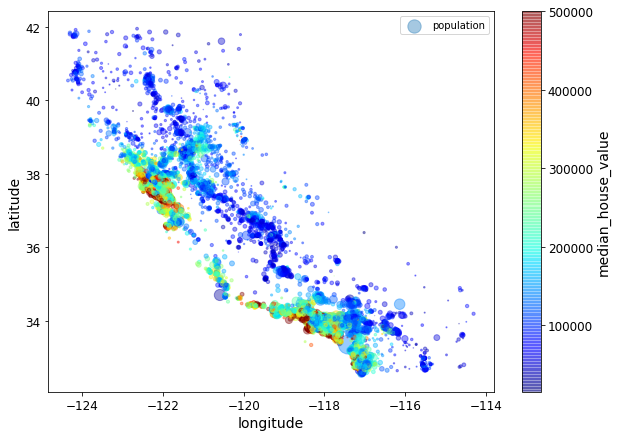

In [41]:
#두드러진 데이터의 패턴을 알아보기 위해서는 매개변수의 조정이 필요하다 
#s : 원의 반지름은 해당 구역의 인구를 의미
#c : 색을 가격
#camp : 낮은가격~높은 가격을 의미한다. 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

주택 가격은 지역과 인구밀도와 관련이 높다

#### 2.4.2 상관관계 조사

In [44]:
#corr
corr_matrix=housing.corr() #상관계수 출력 객체 생성
corr_matrix['median_house_value'].sort_values(ascending=False) #주택가격과 다른 특성과의 상관계수

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023485EABCF8>,
      dtype=object)

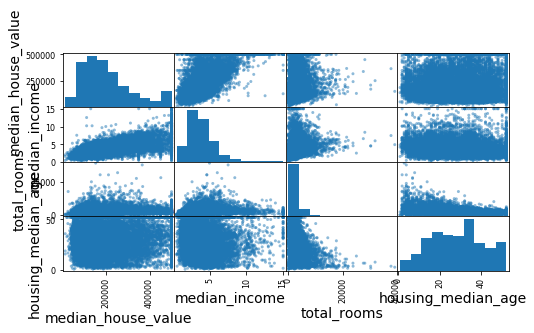

In [47]:
#산점도를 활용하여 상관관계 보는 경우
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(8, 4))

위의 결과를 확인해보면, house_median_value와 가장 선형적인 관계가 있어보이는 median_income에 대해 산점도 다시 그려본다

[0, 16, 0, 550000]

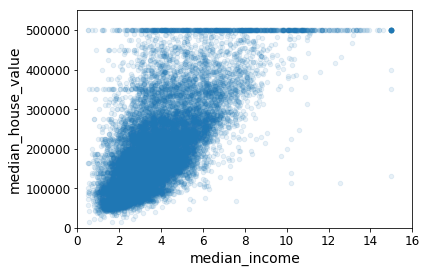

In [48]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

1. 상관관계가 매우 강하다(선형적인 관계를 나타내므로)
2. 가격 제한 값이 매우 잘 보인다. 즉 모델 적용시에 이런 제한값은 dataset에서 제외해주는 작업이 필요할 것이라 예상한다

#### 2.4. 특성 조합으로 실험
앞에서 변수를 선택할 때, 변수 중요도가 높은 변수를 선택할 수 있다고도 했고, 두번째는 특성데이터를 만들어서 모델에 적용할 수도 있다고 했다. 이 과정을 위해서 여러 특성조합을 살펴보는 과정이 필요.

In [50]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [51]:
#특성조합을 추가하여 상관관계 array
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### 2.5. 머신러닝 알고리즘을 위한 데이터 전처리
함수로 지정하여, 다른 프로젝트에 적용시에 쉽게 적용이 가능하도록 한다. 데이터전처리를 소개할 순서를 다시 정리.<br>
1. 데이터 정제 (결손데이터 처리등)
2. 텍스트, 범주형 데이터 처리
3. feature scaling
4. 변환 파이프라인

#### 2.5.1 데이터 정제
**결손 데이터의 처리 방법:** pandas, sklearn<br>
- 해당 구역을 삭제한다 = 결측data 삭제
- 전체 특성의 삭제
- 어떤 값으로 .fillna

In [56]:
#결측값을 전체 제거
housing.dropna(subset=["total_bedrooms"]).head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974


In [58]:
#전체 특성을 삭제하는 경우
housing.drop('total_bedrooms',axis=1).head(3)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974


In [62]:
#어떤 값으로 결측치를 채우는 경우
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)

In [64]:
#sklearn사용하는 경우
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median') #중간값으로 대체할 수 있는 객체의 생성

In [66]:
#중간값은 수치형 데이터에서만 사용가능하다.
housing_num=housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num) #학습
X=imputer.transform(housing_num) #데이터셋에 적용

In [67]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

#### 2.5.2. 텍스트와 범주형 데이터 특성 다루기

In [68]:
#텍스트 데이터
housing_cat=housing['ocean_proximity']
housing_cat.head(3)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
Name: ocean_proximity, dtype: object

대부분의 머신러닝 알고리즘은 숫자형 데이터를 데이터로 받아들이므로, 텍스트 데이터를 숫자로 바꿔서 정숫값으로 mapping해주는 작업이 필요하다 

In [71]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
print(housing_cat_encoded[:10])
print(housing_categories)

[0 0 1 2 0 2 0 2 0 0]
Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')


각 데이터 수치는 '수치적인'의미를 가지지 않기 때문에 가중치를 두지 않고 범주형변수로 간주하기위해 원핫인코딩을 적용한다. 

In [73]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(categories='auto') #원핫인코딩 객체 생성
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray() #type(ndarray)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### 2.5.3 나만의 변환기 생성

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None): #여기서 학습되는건 없다
        return self  
    def transform(self, X, y=None): #변환
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### 2.5.4 feature scaling
- minmax scaling
- 표준화
- robust

In [75]:
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

In [76]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [77]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeatuer들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

featuer들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 2.5.5 변환 파이프라인

사이킷런에서는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline class를 제공한다. 

In [80]:
#pipeline은 연속된 단계를 실행할 이름.추정기 쌍의 목록을 입력으로 받는다. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [81]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.1349975 ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.78819259],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.38346663],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.49537999],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.29207745],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.08517771]])

In [86]:
#데이터프레임에서 필요한 부분만을 추출할 수 있는 class를 만든다. 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [89]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [90]:
#위에서 만든 두 파이프라인을 하나로 합침
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [91]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### 2.6 모델 선택과 훈련

#### 2.6.1. 훈련셋에서 훈련하고 평가하기

In [95]:
housing_labels = strat_train_set["median_house_value"].copy()

In [96]:
#모델 평가방법을 설명하기위해 먼저 모델을 설정하고 학습시킨다
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) #학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
#예시로 sample데이터의 몇개에만 적용해보도록 한다. 
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)#full pipeline은 fit~transform을 모두 포함

In [98]:
print('예측:', lin_reg.predict(some_data_prepared))
print('레이블: ',list(some_labels))

예측: [286600. 340600. 196900.  46300. 254500.]
레이블:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


예측한 데이터와 레이블 데이터가 생성이 되었으므로, 회귀에 대한 성능을 알아볼 수가 있다. 앞에서 언급했듯이 **회귀에서의 성능은 RMSE를 사용**한다. rmse를 구하기 위해서는 sklearn에서 제공하는 mean_squared_error모듈을 사용한다. rmse도 결국은 실제 레이블 값과 예측값을 비교하여 나타내는 값이므로, label과 prediction을 인자로 받는다. 

In [102]:
from sklearn.metrics import mean_squared_error

house_predictions=lin_reg.predict(housing_prepared) #예측값
lin_mse=mean_squared_error(housing_labels, house_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

1.693452485544764e-10

#### 2.6.2 교차검증을 사용한 평가
data split할 시에, 데이터의 상황에 따라 훈련데이터를 나누는데, 교차검증을 사용하기도 한다. (표본론에서 쓰던 계통추출방법과 비슷하다), K-fold cross validation을 사용한다. <br>
기본적으로 **kfold**를 사용을 하면 불균형한 데이터에 대해서는 **stratified kfold**를 사용한다. 결국 교차검증 또한 과적합에 대한 대비책이라고 볼 수가 있다. 

In [104]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [105]:
#cross_cal_score함수는 classifier가 입력되면 stratified Kfold방식으로 레이블 값의 분포에 따라 학습/테스트 데이터를 분할한다
#cv로 저장된 횟수만큼 scoring parameter로 지정된 평가지표로 평가 결괏값을 배열로 반환한다. 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error',cv=10)
tree_mse_scores=np.sqrt(-scores)

In [108]:
print('교차검증별 정확도:',np.round(scores, 4)) #총 cv=10개의 결괏값이 출력이 된다. 
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차검증별 정확도: [ -7487.8935  -9981.8402  -8188.9764 -16638.401   -7795.2756 -98578.5591
 -47368.2623 -15420.957   -9672.9255  -7074.5003]
평균 검증 정확도: -22820.7591


### 2.7. 모델 세부 튜닝